In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

from src.agents import ContinuosActorCritic
from src.networks import ActorCriticNetwork
from src.policies import GaussianPolicy
from src.experience import ExperienceSorceDiscountedSteps

GAMMA = 0.99
LEARNING_RATE = 0.001
ENTROPY_BETA = 0.01
N_STEPS = 4
BATCH_SIZE = 32

CHECKPOINT_PATH = os.path.join("models", "05_pendulum_ac.tar")


env = gym.make("Pendulum-v0")
test_env = gym.make("Pendulum-v0")
device = torch.device("cpu")
net = ActorCriticNetwork(
    env.observation_space.shape[0], env.action_space.shape[0]
).to(device)

agent = ContinuosActorCritic(
    env=env,
    test_env=test_env,
    net=net,
    device=device,
    gamma=GAMMA,
    beta_entropy=ENTROPY_BETA,
    lr=LEARNING_RATE,
    n_steps=N_STEPS,
    batch_size=BATCH_SIZE,
    chk_path=None,
    # chk_path=CHECKPOINT_PATH,
)

In [2]:
env.action_space

Box(-2.0, 2.0, (1,), float32)

In [3]:
agent.policy = GaussianPolicy(agent.net, agent.device)
agent.test_policy = GaussianPolicy(agent.net, agent.device, test=True)
agent.exp_train_source = ExperienceSorceDiscountedSteps(
    env=agent.env,
    policy=agent.policy,
    gamma=agent.gamma,
    n_steps=agent.n_steps,
    steps=BATCH_SIZE,
)
agent.exp_test_source = ExperienceSorceDiscountedSteps(
    env=agent.test_env,
    policy=agent.test_policy,
    gamma=agent.gamma,
    n_steps=agent.n_steps,
    steps=BATCH_SIZE,
)
agent.exp_test_source.render = True

In [4]:
random_net = ActorCriticNetwork(
    env.observation_space.shape[0], env.action_space.shape[0]
).to(device)
random_policy = GaussianPolicy(random_net, device)
exp_random_source = ExperienceSorceDiscountedSteps(test_env, random_policy, gamma=GAMMA, n_steps=N_STEPS, steps=BATCH_SIZE)

In [5]:
exp_random_source.render = True
exp_random_source.play_episode()
test_env.close()

In [6]:
agent.learn(1000, verbose_every=100)
# agent.plot_performance()

 10%|█         | 103/1000 [00:04<00:40, 22.19it/s]
 100: loss=1.112978,  mean reward=-1408.93,  steps/ep=200,  episodes=64
 20%|██        | 202/1000 [00:09<00:35, 22.19it/s]
 200: loss=0.330655,  mean reward=-1583.15,  steps/ep=200,  episodes=128
 30%|███       | 301/1000 [00:13<00:31, 21.87it/s]
 300: loss=-0.078204,  mean reward=-1459.84,  steps/ep=200,  episodes=192
 40%|████      | 403/1000 [00:18<00:26, 22.52it/s]
 400: loss=0.063917,  mean reward=-1382.53,  steps/ep=200,  episodes=256
 50%|█████     | 502/1000 [00:22<00:21, 22.71it/s]
 500: loss=0.618862,  mean reward=-1359.56,  steps/ep=200,  episodes=320
 60%|██████    | 601/1000 [00:27<00:18, 22.08it/s]
 600: loss=0.124569,  mean reward=-1364.82,  steps/ep=200,  episodes=384
 70%|███████   | 703/1000 [00:31<00:13, 22.19it/s]
 700: loss=0.351800,  mean reward=-1284.01,  steps/ep=200,  episodes=448
 80%|████████  | 802/1000 [00:36<00:08, 22.32it/s]
 800: loss=0.169077,  mean reward=-1286.12,  steps/ep=200,  episodes=512
 90%|███

In [7]:

agent.test(num_episodes=1)
test_env.close()

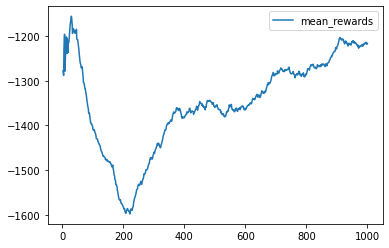

In [8]:
agent.plot_performance(['mean_rewards'])

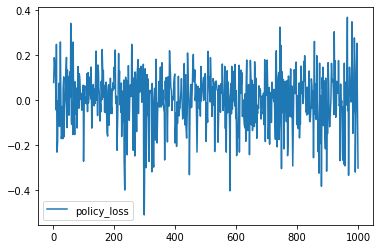

In [9]:
agent.plot_performance(['policy_loss'])

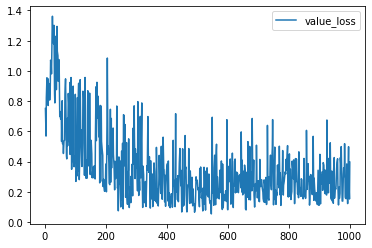

In [10]:
agent.plot_performance(['value_loss'])


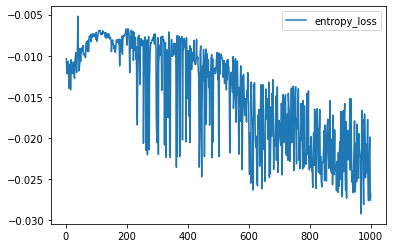

In [11]:
agent.plot_performance(['entropy_loss'])


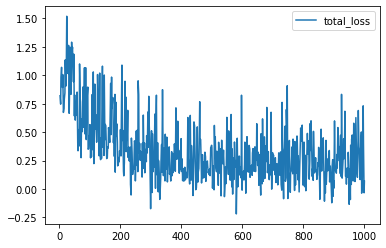

In [12]:
agent.plot_performance(['total_loss'])
